<a href="https://colab.research.google.com/github/Zahab163/Customer_Segmentation_using_KMeans/blob/main/Credit_Card_Customer_Segmenting_USL_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intrduction to K-Mean Clusters:
Machine learning algorithms can be broadly classified into two categories - supervised and unsupervised learning. There are other categories also like semi-supervised learning and reinforcement learning. But, most of the algorithms are classified as supervised or unsupervised learning. The difference between them happens because of presence of target variable. In unsupervised learning, there is no target variable. The dataset only has input variables which describe the data. This is called unsupervised learning.

K-Means clustering is the most popular unsupervised learning algorithm. It is used when we have unlabelled data which is data without defined categories or groups. The algorithm follows an easy or simple way to classify a given data set through a certain number of clusters, fixed apriori. K-Means algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity.





K-Means clustering can be represented diagrammatically as follows:-


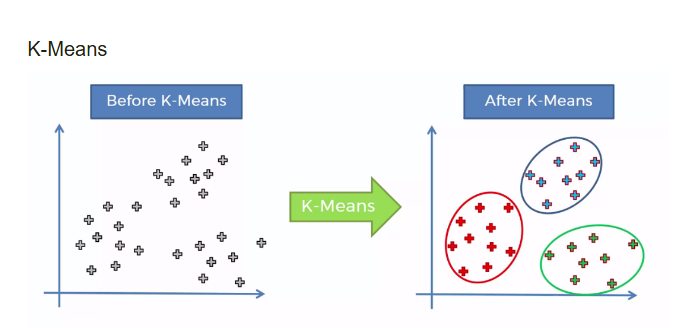

##Applications of clustering:


K-Means clustering is the most common unsupervised machine learning algorithm. It is widely used for many applications which include-

Image segmentation

Customer segmentation

Species clustering

Anomaly detection

Clustering languages

In this project we are using it for Customer Segmentation, segment Credit Card Customers using K-Means Clustering .

##3. K-Means Clustering intuition


K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. It is based on centroid-based clustering.

####Centroid - A centroid is a data point at the centre of a cluster. In centroid-based clustering, clusters are represented by a centroid. It is an iterative algorithm in which the notion of similarity is derived by how close a data point is to the centroid of the cluster. K-Means clustering works as follows:- The K-Means clustering algorithm uses an iterative procedure to deliver a final result. The algorithm requires number of clusters K and the data set as input. The data set is a collection of features for each data point. The algorithm starts with initial estimates for the K centroids. The algorithm then iterates between two steps:-

###3.1 Data assignment step
Each centroid defines one of the clusters. In this step, each data point is assigned to its nearest centroid, which is based on the squared Euclidean distance. So, if ci is the collection of centroids in set C, then each data point is assigned to a cluster based on minimum Euclidean distance.

###3.2 Centroid update step
In this step, the centroids are recomputed and updated. This is done by taking the mean of all data points assigned to that centroid’s cluster.

The algorithm then iterates between step 1 and step 2 until a stopping criteria is met. Stopping criteria means no data points change the clusters, the sum of the distances is minimized or some maximum number of iterations is reached. This algorithm is guaranteed to converge to a result. The result may be a local optimum meaning that assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

The K-Means intuition can be represented with the help of following diagram:-

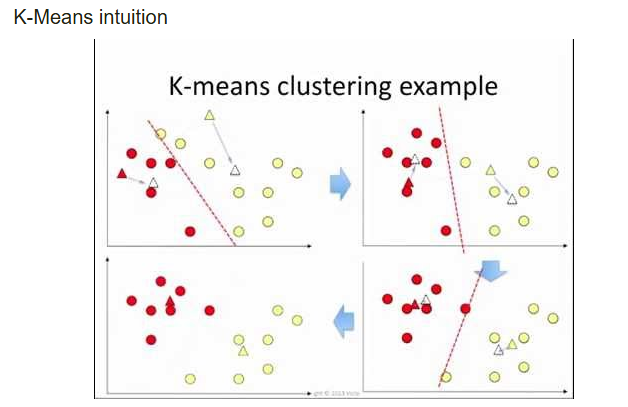

##4. Choosing the value of K

The K-Means algorithm depends upon finding the number of clusters and data labels for a pre-defined value of K. To find the number of clusters in the data, we need to run the K-Means clustering algorithm for different values of K and compare the results. So, the performance of K-Means algorithm depends upon the value of K. We should choose the optimal value of K that gives us best performance. There are different techniques available to find the optimal value of K. The most common technique is the elbow method which is described below.

##5. The elbow method

The elbow method is used to determine the optimal number of clusters in K-means clustering. The elbow method plots the value of the cost function produced by different values of K. The below diagram shows how the elbow method works:-

##The elbow method


We can see that if K increases, average distortion will decrease. Then each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as K increases. The value of K at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

## About Project:
As you Know In this project we are using it for Customer Segmentation, segment Credit Card Customers using K-Means Clustering , Unsupervised Machine Learning Model using Python .

###Import Libraries:

In [1]:
from seaborn.palettes import SEABORN_PALETTES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
seaborn = sns.color_palette("Set1")


In [2]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate sample data
n_customers = 10234

# Customer demographics
ages = np.random.randint(18, 70, n_customers)
genders = np.random.choice(['Male', 'Female'], n_customers)
education = np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_customers, p=[0.3, 0.4, 0.2, 0.1])
marital_status = np.random.choice(['Single', 'Married', 'Divorced'], n_customers, p=[0.4, 0.5, 0.1])

# Credit card usage patterns
annual_income = np.random.normal(60000, 25000, n_customers).astype(int)
annual_income = np.clip(annual_income, 20000, 150000)

credit_limit = (annual_income * np.random.uniform(0.1, 0.3, n_customers)).astype(int)
avg_credit_utilization = np.random.beta(2, 5, n_customers)  # Most people use little credit
total_transactions = np.random.poisson(45, n_customers)
avg_transaction_value = np.random.normal(120, 50, n_customers)

# Spending categories (percentage of total spending)
spending_categories = np.random.dirichlet([2, 3, 1, 4, 2], n_customers) * 100
retail_spending = spending_categories[:, 0] * np.random.uniform(0.8, 1.2, n_customers)
dining_spending = spending_categories[:, 1] * np.random.uniform(0.8, 1.2, n_customers)
travel_spending = spending_categories[:, 2] * np.random.uniform(0.8, 1.2, n_customers)
groceries_spending = spending_categories[:, 3] * np.random.uniform(0.8, 1.2, n_customers)
entertainment_spending = spending_categories[:, 4] * np.random.uniform(0.8, 1.2, n_customers)

# Credit behavior
payment_delay_days = np.random.exponential(2, n_customers).astype(int)
payment_delay_days = np.clip(payment_delay_days, 0, 30)
cash_advance_usage = np.random.beta(1, 10, n_customers) * 100  # Rarely used
online_transactions_ratio = np.random.beta(6, 2, n_customers)  # Mostly online

# Create the dataset
data = {
    'CustomerID': range(1, n_customers + 1),
    'Age': ages,
    'Gender': genders,
    'Education': education,
    'Marital_Status': marital_status,
    'Annual_Income': annual_income,
    'Credit_Limit': credit_limit,
    'Credit_Utilization_Ratio': avg_credit_utilization,
    'Total_Transactions': total_transactions,
    'Avg_Transaction_Value': avg_transaction_value,
    'Retail_Spending_Pct': retail_spending,
    'Dining_Spending_Pct': dining_spending,
    'Travel_Spending_Pct': travel_spending,
    'Groceries_Spending_Pct': groceries_spending,
    'Entertainment_Spending_Pct': entertainment_spending,
    'Avg_Payment_Delay_Days': payment_delay_days,
    'Cash_Advance_Usage_Pct': cash_advance_usage,
    'Online_Transactions_Ratio': online_transactions_ratio
}

df = pd.DataFrame(data)



In [3]:
# Calculate some derived features
df['Total_Spending'] = df['Total_Transactions'] * df['Avg_Transaction_Value']
df['Available_Credit'] = df['Credit_Limit'] * (1 - df['Credit_Utilization_Ratio'])

# Save to CSV
df.to_csv('credit_card_customer_segmentation.csv', index=False)

print("Dataset created successfully!")


Dataset created successfully!


In [4]:
print(f"Shape: {df.shape}")


Shape: (10234, 20)


In [5]:
print("\nFirst 5 rows:")
df.head()



First 5 rows:


,CustomerID,Age,Gender,Education,Marital_Status,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,Travel_Spending_Pct,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit
0,1,56,Female,High School,Single,54675,10933,0.111487,44,140.770608,15.585787,14.031010,14.495461,40.544882,8.816570,0,4.606689,0.577407,6193.906758,9714.109015
1,2,69,Male,Bachelor,Married,59759,16441,0.608085,54,104.713669,13.265069,25.284938,8.925700,30.373583,23.430746,3,0.250193,0.867572,5654.538133,6443.467361
2,3,46,Female,Bachelor,Single,102667,21216,0.467528,51,148.761345,29.951654,14.130573,10.739574,23.097894,15.436989,1,2.354009,0.935437,7586.828574,11296.929302
3,4,32,Female,Bachelor,Married,86677,16378,0.441786,46,83.754740,6.241207,75.236089,3.070052,19.653526,5.310913,1,12.461530,0.524793,3852.718055,9142.434240
4,5,60,Male,Bachelor,Single,48459,9575,0.157618,51,129.130050,22.357440,20.345554,1.412869,50.432887,5.315461,3,6.308816,0.593056,6585.632574,8065.809251


Here's the dataset structure and some sample data:

Dataset Features:
Demographic Features:

CustomerID: Unique identifier

Age: Customer age

Gender: Male/Female

Education: Education level

Marital_Status: Relationship status

Financial Features:

Annual_Income: Yearly income

Credit_Limit: Credit card limit

Credit_Utilization_Ratio: Credit usage percentage

Total_Transactions: Monthly transactions

Avg_Transaction_Value: Average transaction amount

Spending Pattern Features:

Retail_Spending_Pct: Retail spending percentage

Dining_Spending_Pct: Dining spending percentage

Travel_Spending_Pct: Travel spending percentage

Groceries_Spending_Pct: Groceries spending percentage

Entertainment_Spending_Pct: Entertainment spending percentage

Behavioral Features:

Avg_Payment_Delay_Days: Payment delay days

Cash_Advance_Usage_Pct: Cash advance usage

Online_Transactions_Ratio: Online vs offline transactions

##Exploratory Data Analysis(EDA):

In [6]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  10234 non-null  int64  
 1   Age                         10234 non-null  int64  
 2   Gender                      10234 non-null  object 
 3   Education                   10234 non-null  object 
 4   Marital_Status              10234 non-null  object 
 5   Annual_Income               10234 non-null  int64  
 6   Credit_Limit                10234 non-null  int64  
 7   Credit_Utilization_Ratio    10234 non-null  float64
 8   Total_Transactions          10234 non-null  int64  
 9   Avg_Transaction_Value       10234 non-null  float64
 10  Retail_Spending_Pct         10234 non-null  float64
 11  Dining_Spending_Pct         10234 non-null  float64
 12  Travel_Spending_Pct         10234 non-null  float64
 13  Groceries_Spendi

In [7]:
df['Gender'].value_counts()

,count
Gender,
Female,5125
Male,5109


In [8]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,5157
Single,4060
Divorced,1017


In [9]:
df['Education'].value_counts()

,count
Education,
Bachelor,4106
High School,3087
Master,2018
PhD,1023


In [10]:
# we do not know which version pandas is using
#so we use this instead
df.describe()

,CustomerID,Age,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,Travel_Spending_Pct,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit
count,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000,10234.000000
mean,5117.500000,43.564295,60413.187219,12145.062439,0.285403,45.078855,119.288670,16.562696,25.047852,8.352318,33.443508,16.615952,1.545144,9.042177,0.748353,5381.642442,8687.987242
std,2954.445661,14.917520,23972.481928,6126.156702,0.159079,6.671380,50.540480,10.497985,12.442085,7.826020,13.812126,10.616805,2.015809,8.446648,0.144040,2454.696269,4903.894803
min,1.000000,18.000000,20000.000000,2004.000000,0.001339,22.000000,-71.000166,0.173736,0.925043,0.000666,1.650277,0.087657,0.000000,0.000539,0.183878,-3408.007987,669.318089
25%,2559.250000,31.000000,42894.500000,7430.250000,0.160885,41.000000,85.052901,8.607276,15.653254,2.516878,23.252844,8.694097,0.000000,2.704008,0.656866,3730.784427,4976.496736
50%,5117.500000,43.000000,59698.500000,11226.500000,0.265086,45.000000,119.326628,14.593601,23.109072,6.035863,32.033464,14.459637,1.000000,6.619106,0.768243,5250.471995,7742.829008
75%,7675.750000,56.000000,76786.750000,15905.250000,0.387305,49.000000,152.756062,22.493430,32.657828,11.880231,42.174017,22.335564,2.000000,12.821767,0.859684,6932.610408,11417.958977
max,10234.000000,69.000000,150000.000000,42127.000000,0.903913,70.000000,311.939400,71.673876,83.369808,73.958018,90.899549,79.963853,22.000000,58.539574,0.998108,17874.728496,36550.480432


here, we could see at our numerical data it counts mean , median max and all.
* Data mins, medians, max is not drastically different from each other, one reason is we created a dataset (cause of senitive informations of customers). this is a important task to do    

**Note**: we will drop some of the unwanted columns in future like customer

In [11]:
#Removing the customer's ID
df.drop('CustomerID', axis=1, inplace=True)

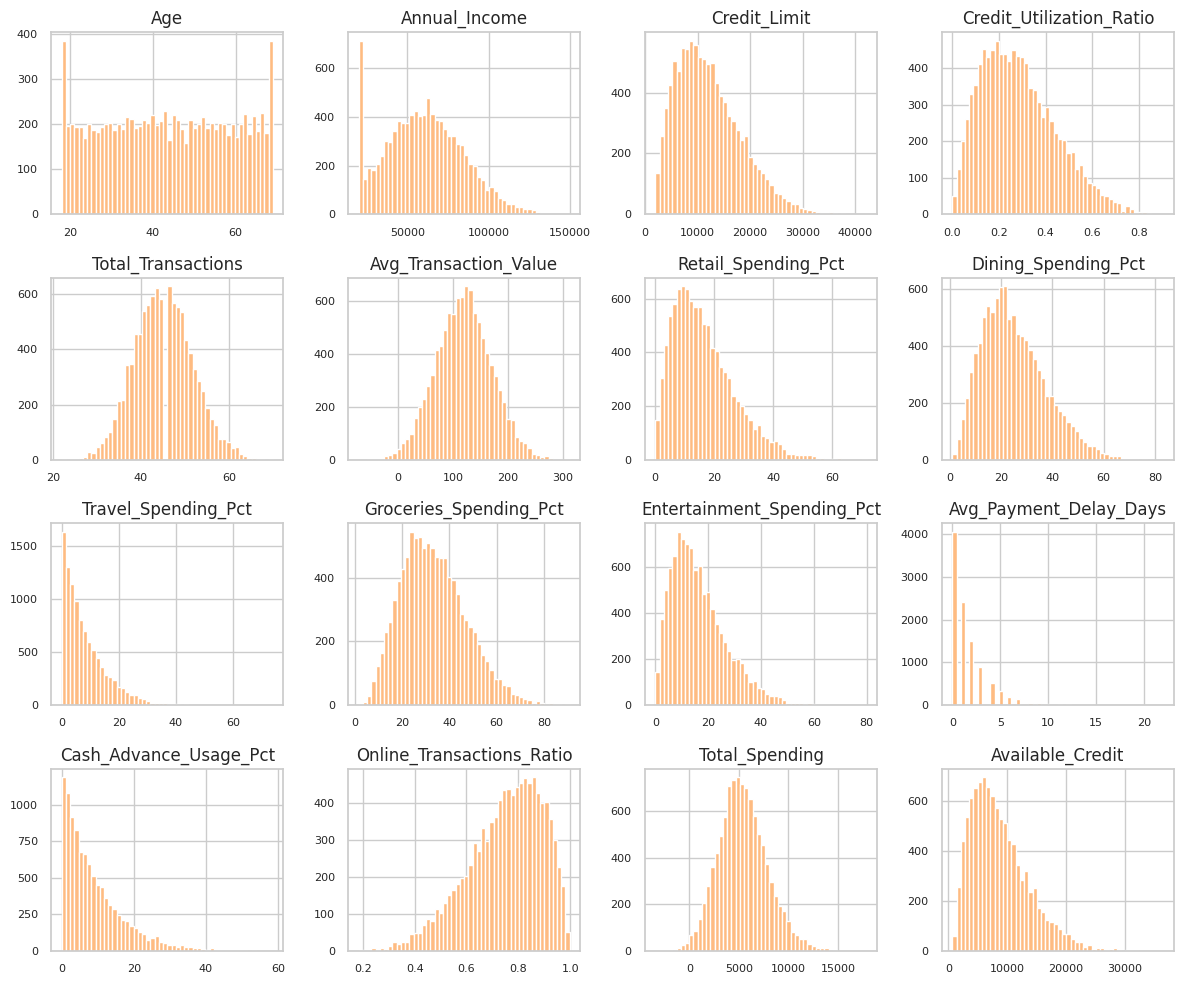

In [12]:
#Displaying a histogram plot
# Set a custom Seaborn style and color palette
sns.set(style="whitegrid", palette="magma_r")
# df.hist() can create its own figure and axes for multiple subplots
fig = df.hist(bins=50, xlabelsize=8, ylabelsize=8, figsize=(12,10))
#adjusts subplot parameters for a tight layout, preventing labels or titles from overlapping.
plt.tight_layout()
#displays the plot
plt.show()

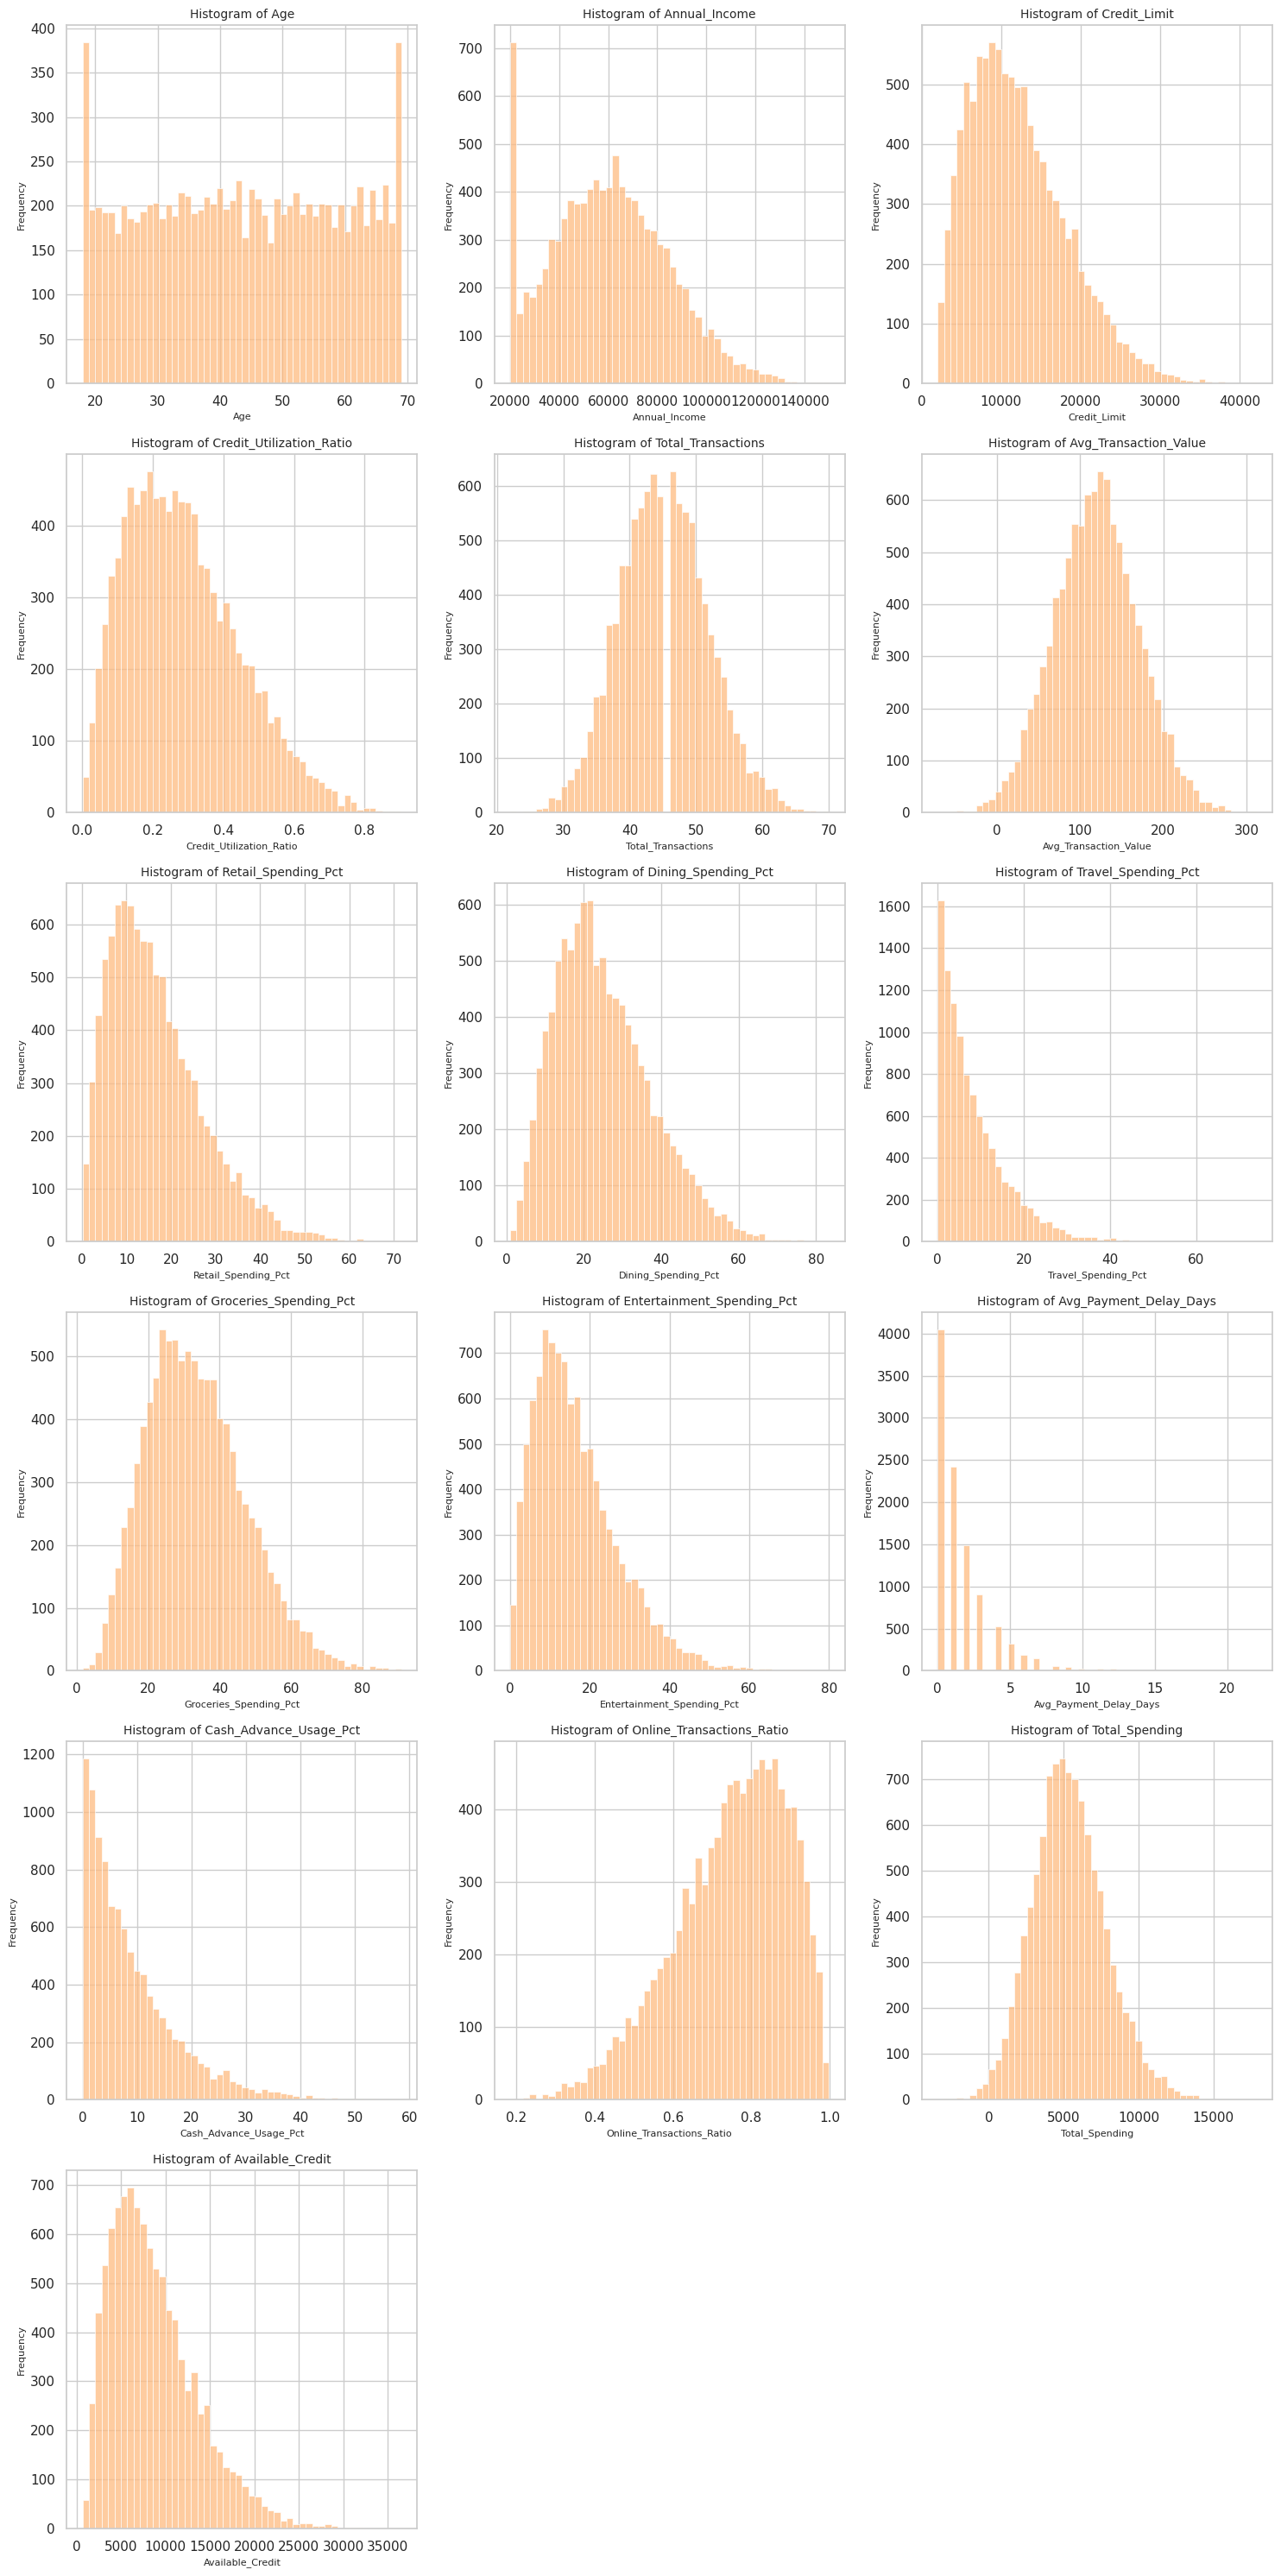

In [13]:
# other way to do the same above code a bit tricky
# Set a custom Seaborn style and color palette
sns.set(style="whitegrid", palette="magma_r")

# Create a figure and axes for each column in the DataFrame
num_cols = df.select_dtypes(include='number').columns
num_plots = len(num_cols)
ncols = 3
nrows = (num_plots + ncols - 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()

# Plot each numeric column as a histogram
for i, col in enumerate(num_cols):
    sns.histplot(df[col], bins=50, ax=axes[i], kde=False)
    axes[i].set_title(f'Histogram of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Frequency', fontsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

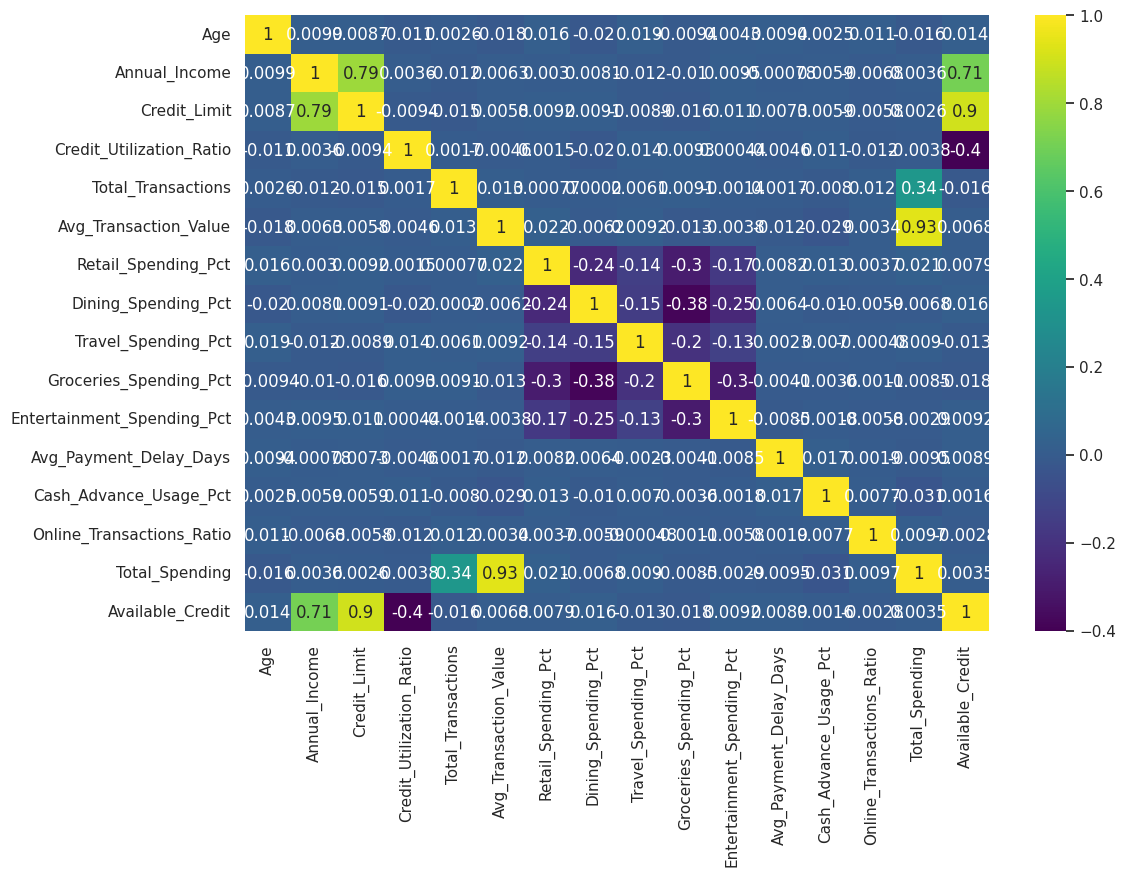

In [14]:
# Checking Correlation
correlations =df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,8))

sns.heatmap(correlations,annot=True, cmap='viridis', ax=ax)
plt.show()


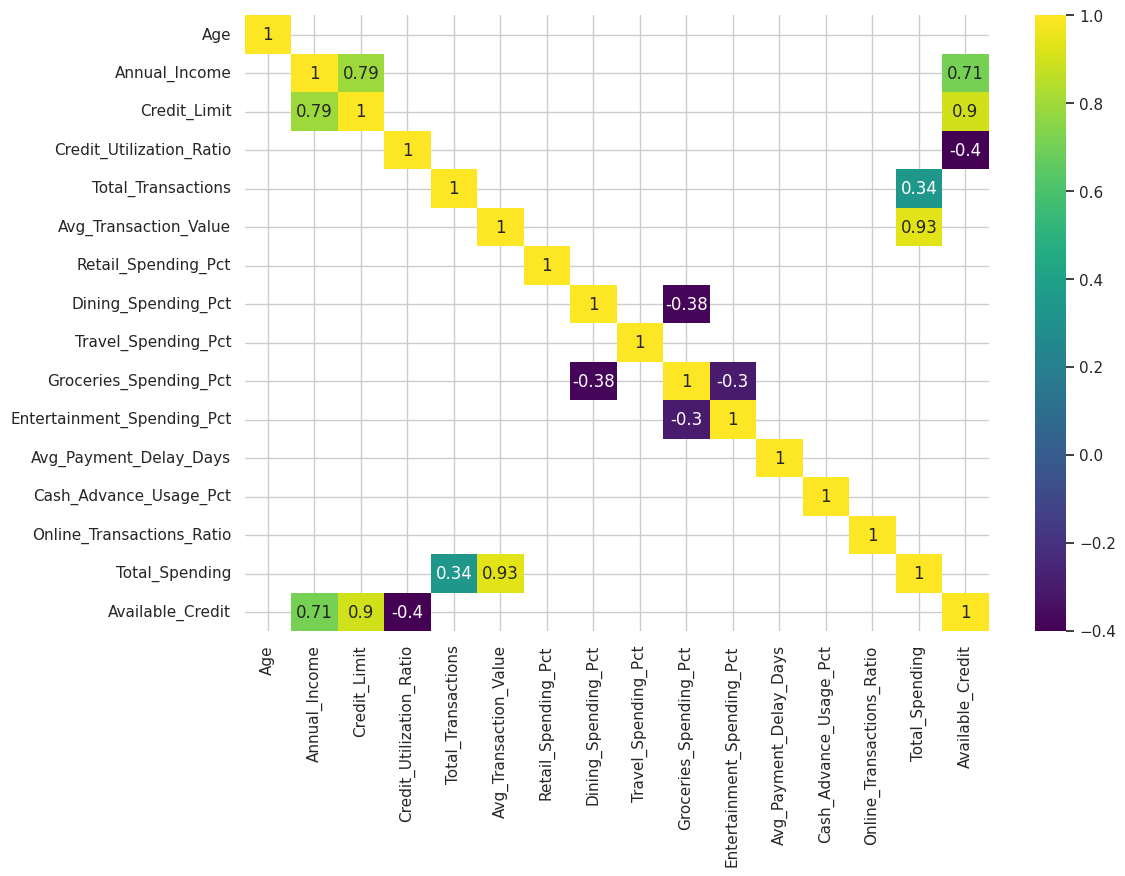

In [15]:
#Transformed Code
# Checking Correlation
correlations =df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(12,8))
#The code here i include shows strongest correlations that are within absolute value over 30%
# cause we wand to keep negative versus positive correlations visible we use or( | ) bar here
sns.heatmap(correlations[(correlations > 0.30) | (correlations < - 0.30)], cmap='viridis', annot=True, ax=ax)
plt.show()

you can see we have a much sparer looking heat map butwe could really see that where are the strenghts .
* positive correlations
* negative correlations
 we could see that the strongly correlated:
 * availabe credit  credit limits are  related to annual incomes which is strongly correlated which makes sense.
 * Total_spendings and Avg_Transactin_Values are also correlated.
* Annual_income and Total_Spendings are correlatedwhich also makes sense if you have much income than your spendings would be higher ..


Here we completed the exploratory Data Analysis (EDA) part



##Feature Engineering
 we are transforming data, always a good idea and best practice is to make a copy your data frame

In [16]:
customer_data = df.copy()

In [17]:
customer_data['Gender'] = df["Gender"].apply(lambda x:1 if x == "Male" else 0)
customer_data.head()

,Age,Gender,Education,Marital_Status,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,Travel_Spending_Pct,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit
0,56,0,High School,Single,54675,10933,0.111487,44,140.770608,15.585787,14.031010,14.495461,40.544882,8.816570,0,4.606689,0.577407,6193.906758,9714.109015
1,69,1,Bachelor,Married,59759,16441,0.608085,54,104.713669,13.265069,25.284938,8.925700,30.373583,23.430746,3,0.250193,0.867572,5654.538133,6443.467361
2,46,0,Bachelor,Single,102667,21216,0.467528,51,148.761345,29.951654,14.130573,10.739574,23.097894,15.436989,1,2.354009,0.935437,7586.828574,11296.929302
3,32,0,Bachelor,Married,86677,16378,0.441786,46,83.754740,6.241207,75.236089,3.070052,19.653526,5.310913,1,12.461530,0.524793,3852.718055,9142.434240
4,60,1,Bachelor,Single,48459,9575,0.157618,51,129.130050,22.357440,20.345554,1.412869,50.432887,5.315461,3,6.308816,0.593056,6585.632574,8065.809251


to process we should convert data type = object into Numerical cause Machines can only understand Maths which are numbers and to apply Machine Learning Model we must convert it into numerical .
so, above we  do convert the output as you can see in the dataframe that we said if Gender is "Male" than the output should be 1 or if else ('Female') than the output answer will be 0 .
* Now we Know 1 means Male in Gender column and
* 0 means Female in Gender column.
**Note** : there were two outputs in gender column Male and Female , so we does not need to make Dummy Variaables( One Hot Encoding) cause it a Boolean (True and False) no ranking and hierarechy to this variable.


Now, we will change all Categorical data into numerical onces:
* Education levels do have some inherent ranking .

In [18]:
education_mapping ={
    'Uneducated': 0 ,
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}
customer_data['Education'] = customer_data['Education'].map(education_mapping)

customer_data.head()

,Age,Gender,Education,Marital_Status,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,Travel_Spending_Pct,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit
0,56,0,1,Single,54675,10933,0.111487,44,140.770608,15.585787,14.031010,14.495461,40.544882,8.816570,0,4.606689,0.577407,6193.906758,9714.109015
1,69,1,2,Married,59759,16441,0.608085,54,104.713669,13.265069,25.284938,8.925700,30.373583,23.430746,3,0.250193,0.867572,5654.538133,6443.467361
2,46,0,2,Single,102667,21216,0.467528,51,148.761345,29.951654,14.130573,10.739574,23.097894,15.436989,1,2.354009,0.935437,7586.828574,11296.929302
3,32,0,2,Married,86677,16378,0.441786,46,83.754740,6.241207,75.236089,3.070052,19.653526,5.310913,1,12.461530,0.524793,3852.718055,9142.434240
4,60,1,2,Single,48459,9575,0.157618,51,129.130050,22.357440,20.345554,1.412869,50.432887,5.315461,3,6.308816,0.593056,6585.632574,8065.809251


Here, we did label encoding so the
* lowerest educational level in uneducated so we do label it with 0
* High Schooler's =  1
* Bachelors = 2
* Masters = 3
* PhD = 4

In [19]:
dummies = pd.get_dummies (customer_data[['Marital_Status']])

customer_data = pd.concat([customer_data, dummies], axis=1)
customer_data.drop(['Marital_Status'], axis=1, inplace=True)
print("\n Customer Data Display")
customer_data.head()


 Customer Data Display


,Age,Gender,Education,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,...,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single
0,56,0,1,54675,10933,0.111487,44,140.770608,15.585787,14.031010,...,40.544882,8.816570,0,4.606689,0.577407,6193.906758,9714.109015,False,False,True
1,69,1,2,59759,16441,0.608085,54,104.713669,13.265069,25.284938,...,30.373583,23.430746,3,0.250193,0.867572,5654.538133,6443.467361,False,True,False
2,46,0,2,102667,21216,0.467528,51,148.761345,29.951654,14.130573,...,23.097894,15.436989,1,2.354009,0.935437,7586.828574,11296.929302,False,False,True
3,32,0,2,86677,16378,0.441786,46,83.754740,6.241207,75.236089,...,19.653526,5.310913,1,12.461530,0.524793,3852.718055,9142.434240,False,True,False
4,60,1,2,48459,9575,0.157618,51,129.130050,22.357440,20.345554,...,50.432887,5.315461,3,6.308816,0.593056,6585.632574,8065.809251,False,False,True


In [20]:
print("\nDataset info:")
print(customer_data.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10234 entries, 0 to 10233
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10234 non-null  int64  
 1   Gender                      10234 non-null  int64  
 2   Education                   10234 non-null  int64  
 3   Annual_Income               10234 non-null  int64  
 4   Credit_Limit                10234 non-null  int64  
 5   Credit_Utilization_Ratio    10234 non-null  float64
 6   Total_Transactions          10234 non-null  int64  
 7   Avg_Transaction_Value       10234 non-null  float64
 8   Retail_Spending_Pct         10234 non-null  float64
 9   Dining_Spending_Pct         10234 non-null  float64
 10  Travel_Spending_Pct         10234 non-null  float64
 11  Groceries_Spending_Pct      10234 non-null  float64
 12  Entertainment_Spending_Pct  10234 non-null  float64
 13  Avg_Payment_Dela

we chechecke the .info to take some intel about our data now we do not have any data type = objects here ...
our dataset is ready to ML modeling .

Scaling Process:

In [21]:
from sklearn.preprocessing import StandardScaler

X = customer_data

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

Frist, We dropped the Customer ID , cause we do not need that.
* created a variable X  
* X_scaled for scaled data
* We initialize Standard Scaler and use the .fit method on our data and tranfrom our data and called it X_scaled


In [22]:
#to display the X_scaled data
X_scaled

array([[ 0.83367154, -0.9984378 , -1.16148063, ..., -0.33217404,
        -1.00784787,  1.23316246],
       [ 1.70517262,  1.00156464, -0.10121903, ..., -0.33217404,
         0.99221324, -0.81092316],
       [ 0.16328609, -0.9984378 , -0.10121903, ..., -0.33217404,
        -1.00784787,  1.23316246],
       ...,
       [ 0.6325559 ,  1.00156464, -0.10121903, ..., -0.33217404,
         0.99221324, -0.81092316],
       [ 0.83367154, -0.9984378 , -1.16148063, ..., -0.33217404,
         0.99221324, -0.81092316],
       [-0.03782955, -0.9984378 , -0.10121903, ..., -0.33217404,
         0.99221324, -0.81092316]])

* We can see that it is scaled here in NumPy Array for Passing to the Machine so that it can learn our Data Properly
* but here , for our Display we will convert it to the DataFrame again ,

So, if we look at our displayed Head DataFrame above we could see that we have really different sized numbers.
* We have 1 for Education versus Annual_Income = 54675

Where clustering , It's based on distances between points and centroid and having values that are spread apart like this it could just confuse our Model .
* Scaling makes everything within a smaller range and
* Standard Scaler is based on Standard daviation and mean .When it Scaled it has a mean of 0

##Building the Model:
**Clustering** imagine a scatter plot  and on the scatter plot you have grouping of points at different points as shown above ...those are going to be clusters but some times it's not clear as three distinct groups
and how do you know the correct number of clusters are?

**Elbow Rule** the Elbow rule is a visual way of looking at the inertia of different numbers of clusters .


In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## silhouette_score from sklearn.metrics
- Purpose: Evaluates the quality of clustering.
- Usage: Computes how well each data point fits within its cluster compared to other clusters


In [24]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


This code performs Principal Component Analysis (PCA) on your scaled customer data.

**pca** = PCA(n_components=2): This line initializes the PCA model. n_components=2 tells PCA to reduce the dimensionality of your dataset to just two principal components. This is often done to make the data visualizable on a 2D plot.
* X_reduced = pca.fit_transform(X): This line does two things:
* fit(X): PCA analyzes the input data X (which is your customer_data after scaling) to find the principal components. These components are new axes that capture the most variance in the data.
* transform(X): It then projects the original X data onto these new two principal components, effectively reducing its dimensionality.

**The result, X_reduced, is a NumPy array containing your customer data but now represented by only two features, which are linear combinations of the original features. This makes it suitable for plotting in a 2D space to potentially visualize the clusters.**

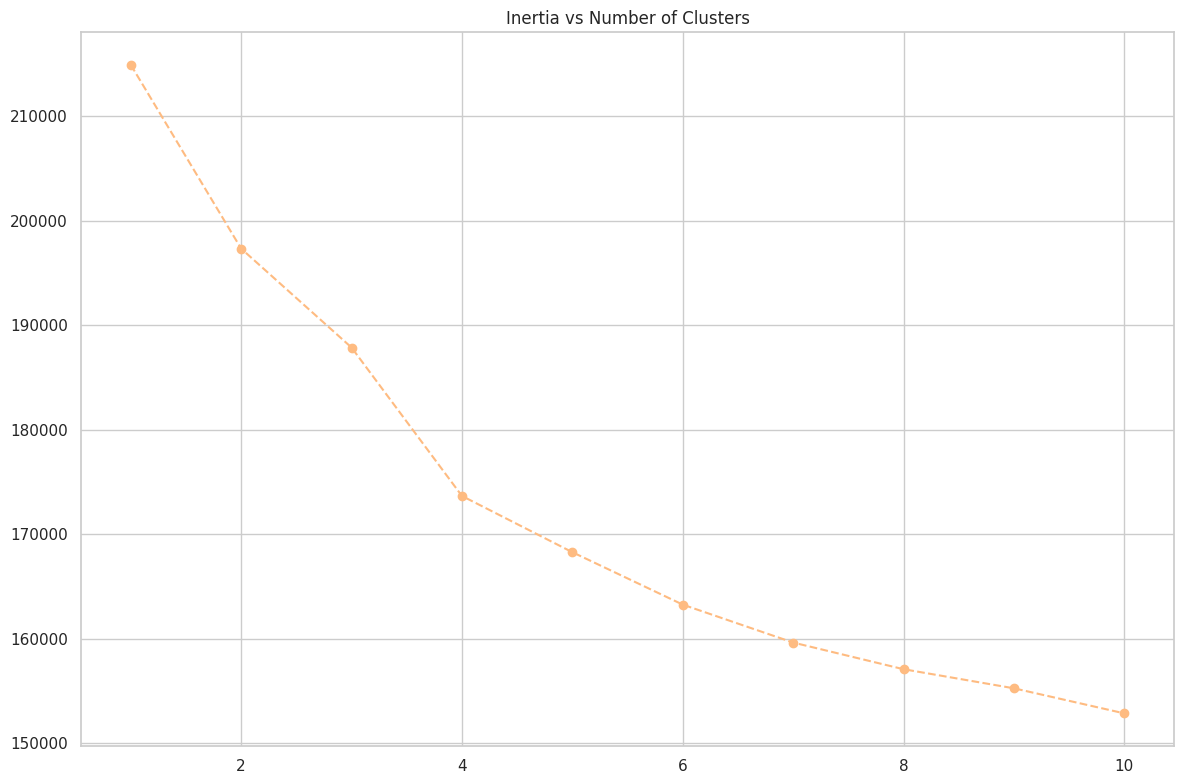

In [36]:
X = pd.DataFrame(X_scaled)
inertias = []


for k in range(1,11):
  model = KMeans(n_clusters=k)
  y = model.fit_predict(X)
  inertias.append(model.inertia_)


plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.title('Inertia vs Number of Clusters')

plt.tight_layout()
plt.show()

Here , we took our X_scaled data back into a DataFrame and we are initializing an empty list called inertia and **inertias in K-Mean Clusteringis a sum of Squared Distances between every data point and its corresponding centroid** .
* **centroid is a center of a cluster .**
* The closer a point is to the centroid , the smaller the inertia. or
* The closer all the points to the centroid, the smaller the inertia.
* **Smaller Inertia is better cause it means cluster is stronger.**

However, We technically have centroid for every point in our dataset . if we have a 100 data points , we have 100 centroid , inertia 0.That's not right cause then we do not have any insights.
**100 Clusters and 100 Data points Credit Card Company going to say thatbut what can we do with that**
* we do not want 1 cluster or we also do not want 100 clusters . What's the Solution?
* Then we will use Elbow rule and we are going to visualize the inerteas as time goes on.


In [26]:
model = KMeans(n_clusters=4)
y = model.fit_predict(X_scaled)

y

array([2, 3, 0, ..., 1, 1, 3], dtype=int32)

Here, we are initializing a new K-Meansmodel , but we are specifyingfive clusters because there is our **Elbow**
* then we are fitting and predicting our Model on our scaled data and assigning it to **y**.
* y = Number 0, 1 ,2 ,3, or 4.that corresponds with the cluster that a row of data belongs to.
* it's 0, 1 ,2 or 3 cause it's **zero indexing**.

Now , we are going to add a new column to our original data frame that we made earlier in very beginning named **df** cause we had done the model at this point we do not need to use our scale data anymore .
* we want to do is insights, and the insights are going to add the **y** herewhich was cluster assignments from our model and we are adding **1** to make it Human readable.

In [27]:
df['CLUSTER'] = y + 1

df.head()


,Age,Gender,Education,Marital_Status,Annual_Income,Credit_Limit,Credit_Utilization_Ratio,Total_Transactions,Avg_Transaction_Value,Retail_Spending_Pct,Dining_Spending_Pct,Travel_Spending_Pct,Groceries_Spending_Pct,Entertainment_Spending_Pct,Avg_Payment_Delay_Days,Cash_Advance_Usage_Pct,Online_Transactions_Ratio,Total_Spending,Available_Credit,CLUSTER
0,56,Female,High School,Single,54675,10933,0.111487,44,140.770608,15.585787,14.031010,14.495461,40.544882,8.816570,0,4.606689,0.577407,6193.906758,9714.109015,3
1,69,Male,Bachelor,Married,59759,16441,0.608085,54,104.713669,13.265069,25.284938,8.925700,30.373583,23.430746,3,0.250193,0.867572,5654.538133,6443.467361,4
2,46,Female,Bachelor,Single,102667,21216,0.467528,51,148.761345,29.951654,14.130573,10.739574,23.097894,15.436989,1,2.354009,0.935437,7586.828574,11296.929302,1
3,32,Female,Bachelor,Married,86677,16378,0.441786,46,83.754740,6.241207,75.236089,3.070052,19.653526,5.310913,1,12.461530,0.524793,3852.718055,9142.434240,2
4,60,Male,Bachelor,Single,48459,9575,0.157618,51,129.130050,22.357440,20.345554,1.412869,50.432887,5.315461,3,6.308816,0.593056,6585.632574,8065.809251,3


here, we have our Model .

##Analyzing the Clusters:
we need to do some analysis about what these clusters are telling us to give information to our end user,our stakeholder of the credidit card company
* we are going to look at our numeric points/ numeric variables* we are going to groupby clusters.
* and visualize some plots

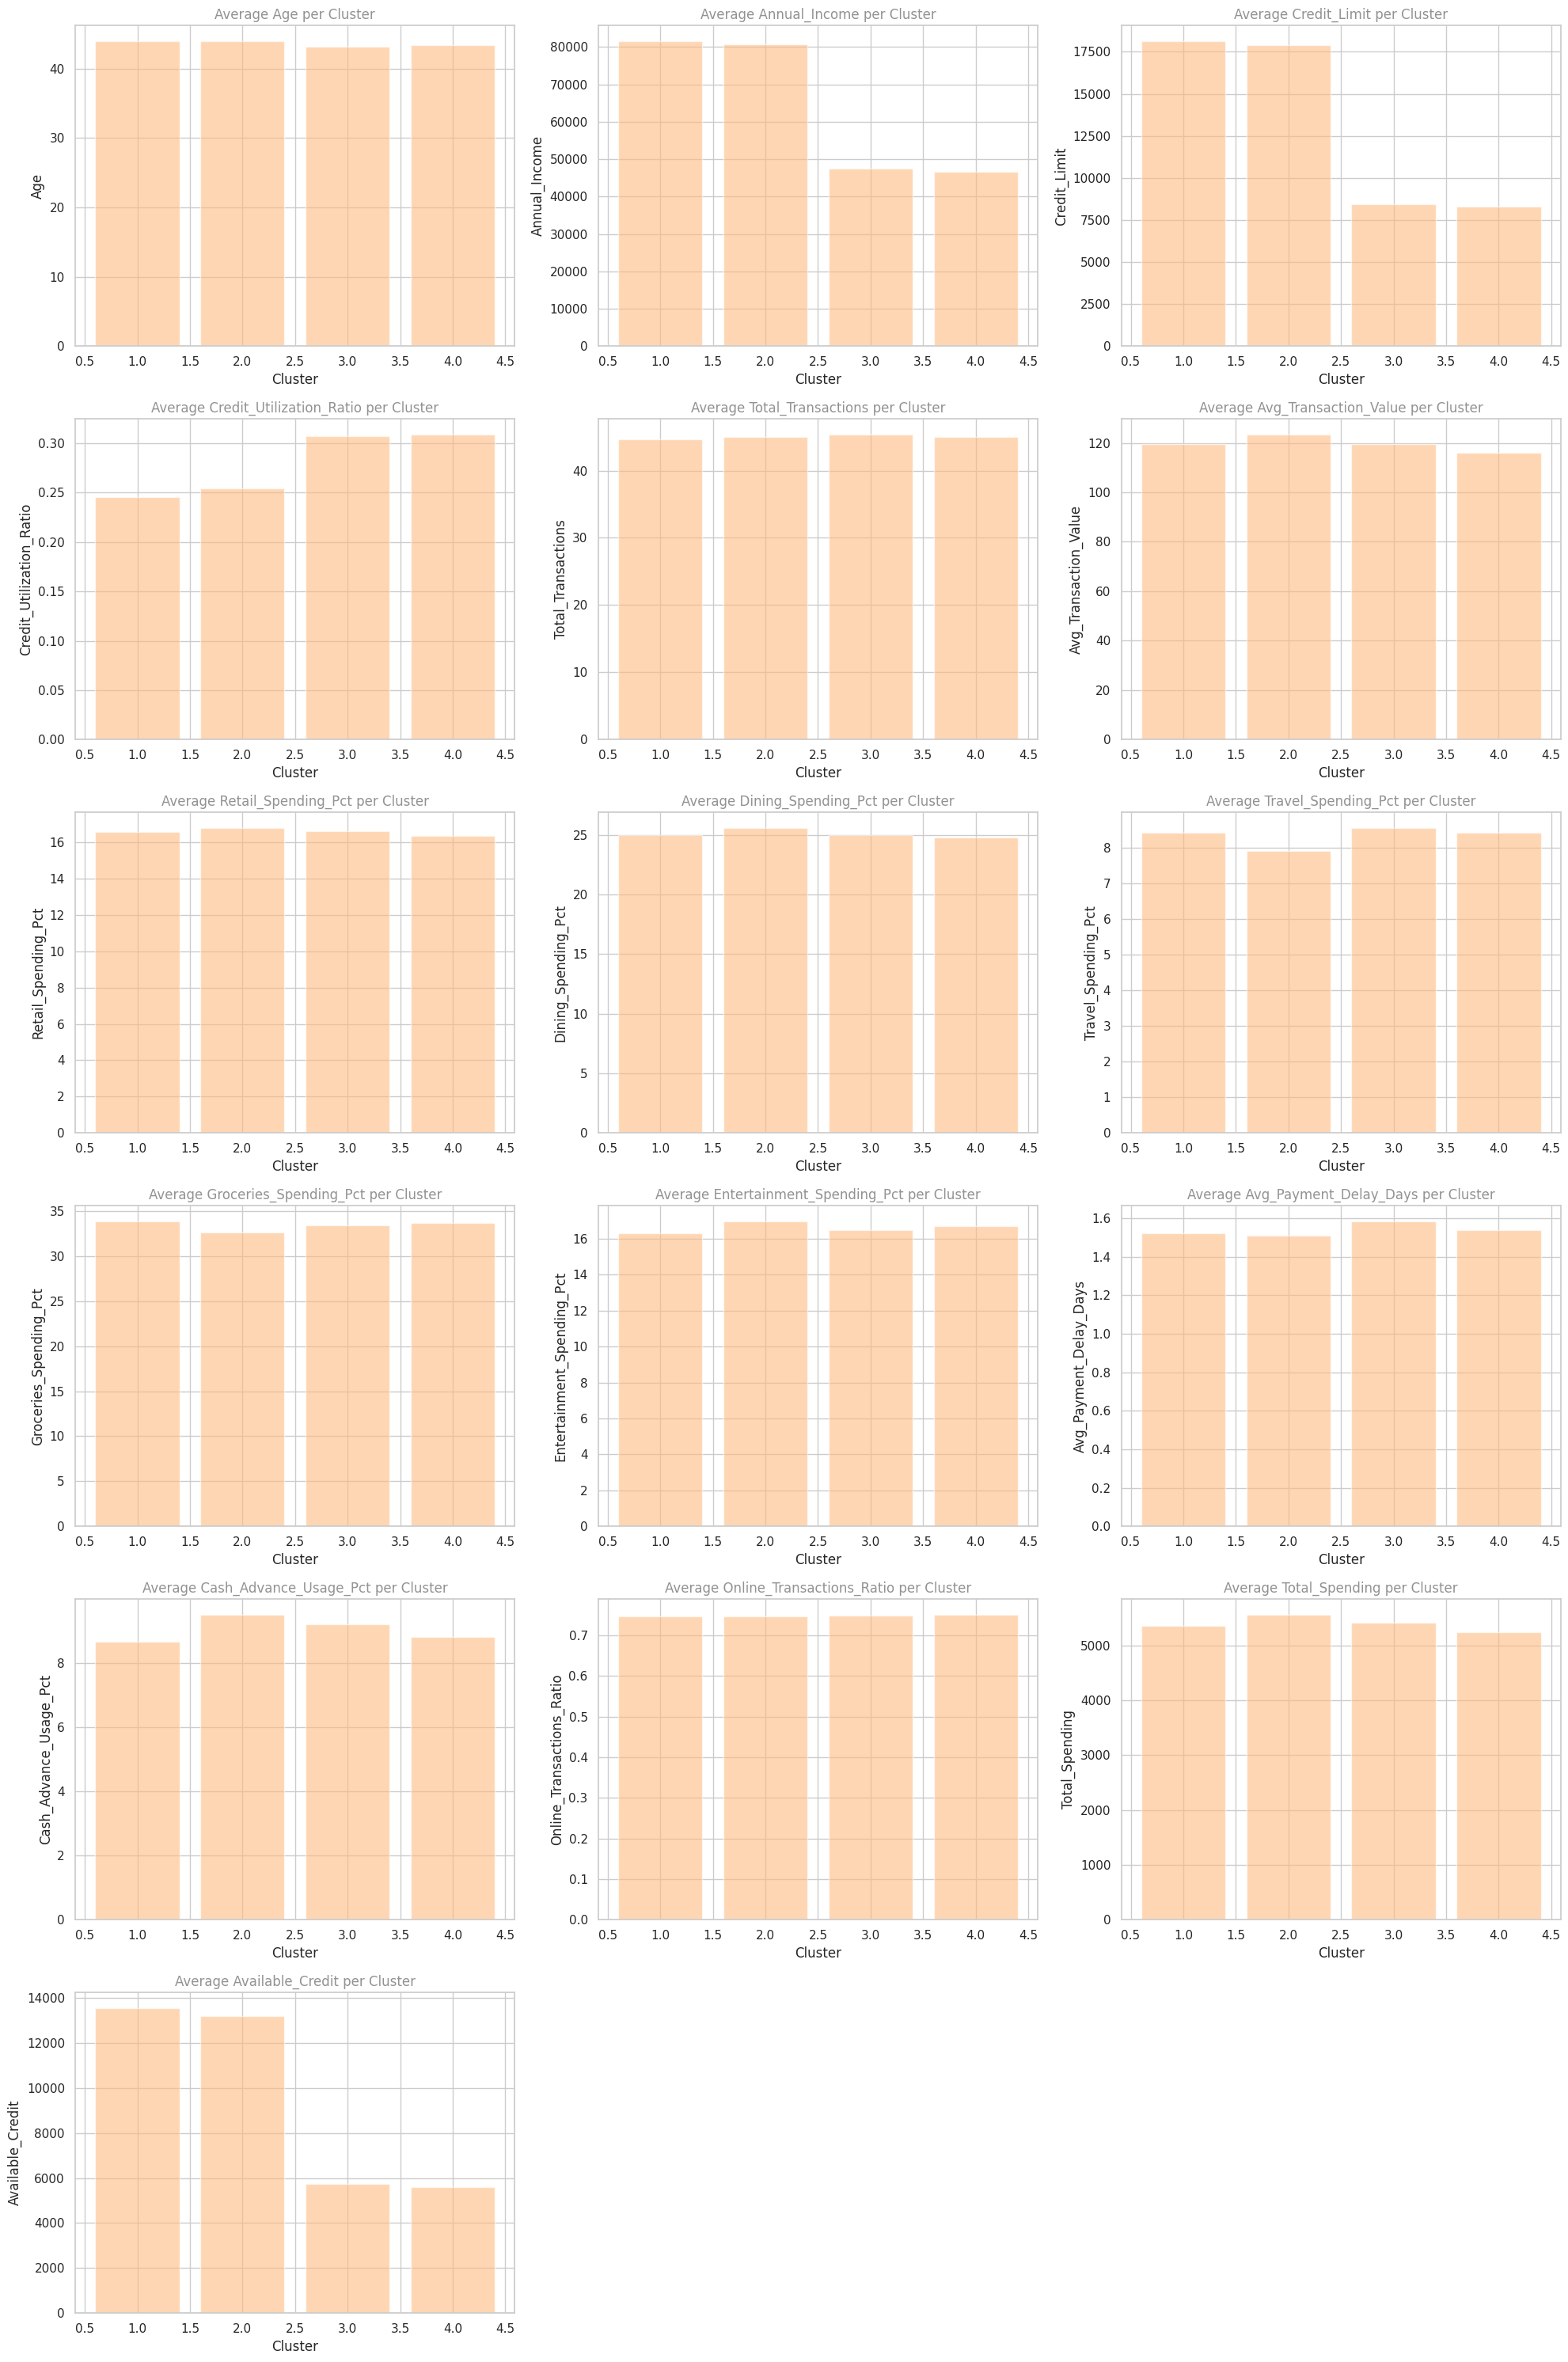

In [28]:
numeric_columns = df.select_dtypes(include=np.number).drop(["CLUSTER"], axis=1).columns

num_plots = len(numeric_columns)
ncols = 3 # Number of columns for the subplot grid
nrows = (num_plots + ncols - 1) // ncols # Calculate rows needed

fig = plt.figure(figsize=(20, 5 * nrows))
for i, column in enumerate(numeric_columns):
  df_plot = df.groupby('CLUSTER')[column].mean()
  ax = fig.add_subplot(nrows, ncols, i+1)
  ax.bar(df_plot.index, df_plot, alpha=0.6)
  ax.set_title(f'Average {column.title()} per Cluster', alpha=0.5)
  ax.set_xlabel('Cluster')
  ax.set_ylabel(column.title())

plt.tight_layout()
plt.show()

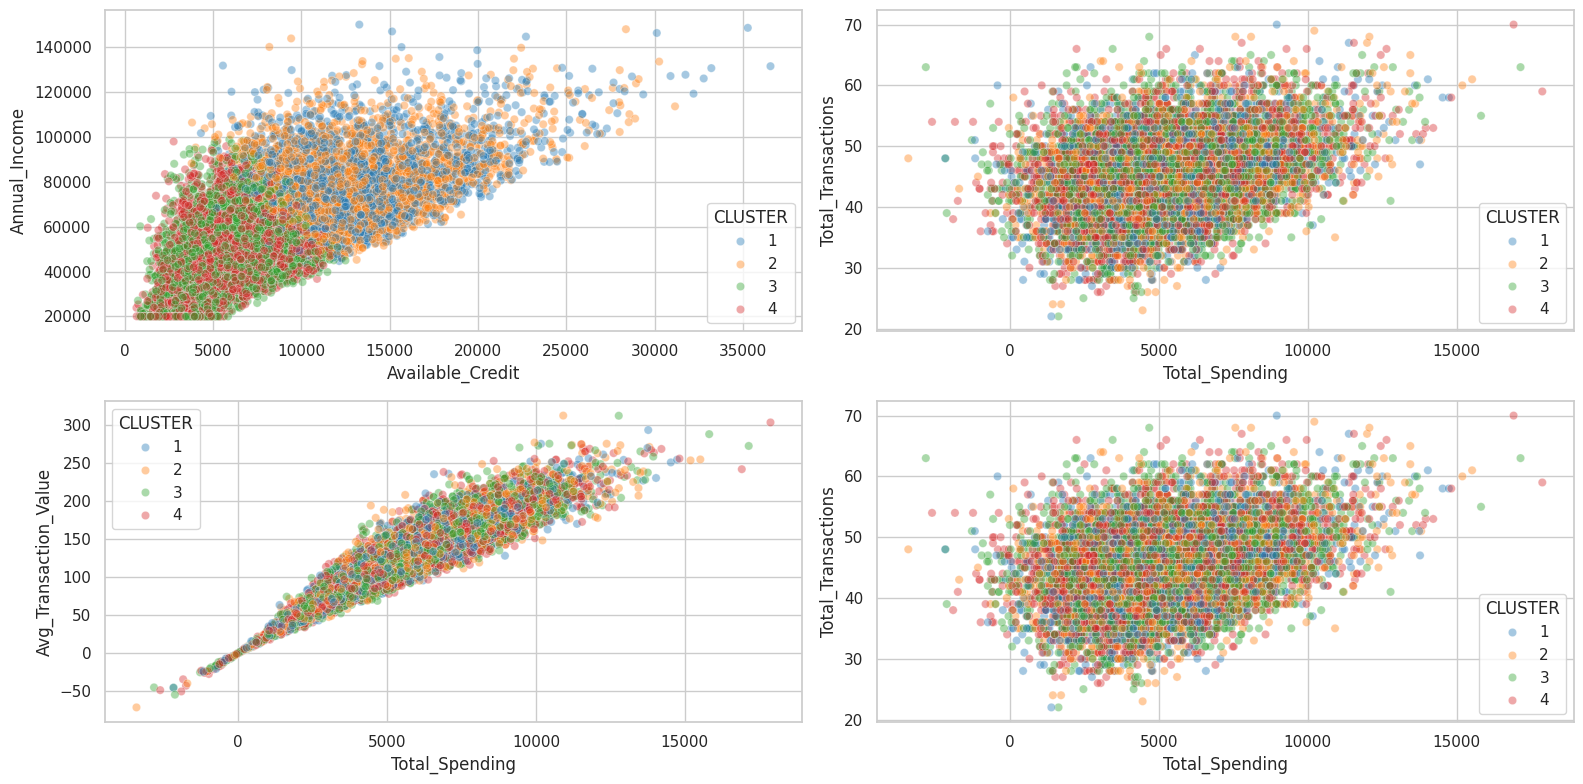

In [29]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 8))
sns.scatterplot(x="Available_Credit", y="Annual_Income", hue= "CLUSTER", data=df, palette="tab10", alpha=0.4, ax=ax1)
sns.scatterplot(x="Total_Spending", y="Total_Transactions", hue= "CLUSTER", data=df, palette="tab10", alpha=0.4, ax=ax2)
sns.scatterplot(x="Total_Spending", y="Avg_Transaction_Value", hue= "CLUSTER", data=df, palette="tab10", alpha=0.4, ax=ax3)
sns.scatterplot(x="Total_Spending", y="Total_Transactions", hue= "CLUSTER", data=df, palette="tab10", alpha=0.4, ax=ax4)
plt.tight_layout()
plt.show()

Each bar chart represents a numerical feature, showing the average value of that feature for each of the four customer clusters (labeled 1 to 4). By examining these plots, we can start to understand the distinct characteristics of each customer segment:

##Cluster 1 (Blue Bars):

Tends to have a higher average age.
Moderate to high Annual Income and Credit Limit.
Lower Credit Utilization Ratio.
Relatively lower Total Transactions and Avg Transaction Value.
Higher Groceries Spending Percentage and lower Dining/Travel/Entertainment Spending Percentages.
Lower Cash Advance Usage Percentage and moderate Online Transactions Ratio.
Higher Available Credit, indicating they manage credit well.
##Cluster 2 (Orange Bars):

Average age is lower than Cluster 1, but not the lowest.
Generally lower Annual Income and Credit Limit compared to Cluster 1.
Higher Credit Utilization Ratio, suggesting they use a larger portion of their available credit.
Moderate Total Transactions and Avg Transaction Value.
Higher Retail and Dining Spending Percentages, and lower Groceries Spending Percentage.
Higher Cash Advance Usage Percentage and lower Online Transactions Ratio.
Lower Available Credit.
##Cluster 3 (Green Bars):

Generally has the lowest average age.
Lowest Annual Income and Credit Limit.
Very low Credit Utilization Ratio, implying they don't use much of their credit.
Lowest Total Transactions and Avg Transaction Value.
Lowest Spending Percentages across all categories, possibly due to lower income.
Lowest Cash Advance Usage Percentage and very low Online Transactions Ratio.
Moderate Available Credit.
##Cluster 4 (Red Bars):

Has the highest average age among all clusters.
Significantly highest Annual Income and Credit Limit.
Lowest Credit Utilization Ratio, indicating they have high limits but use little.
Highest Total Transactions and Avg Transaction Value.
Highest Travel and Entertainment Spending Percentages, and lowest Retail/Groceries Spending Percentages.
Lowest Cash Advance Usage Percentage and highest Online Transactions Ratio.
Significantly highest Available Credit.

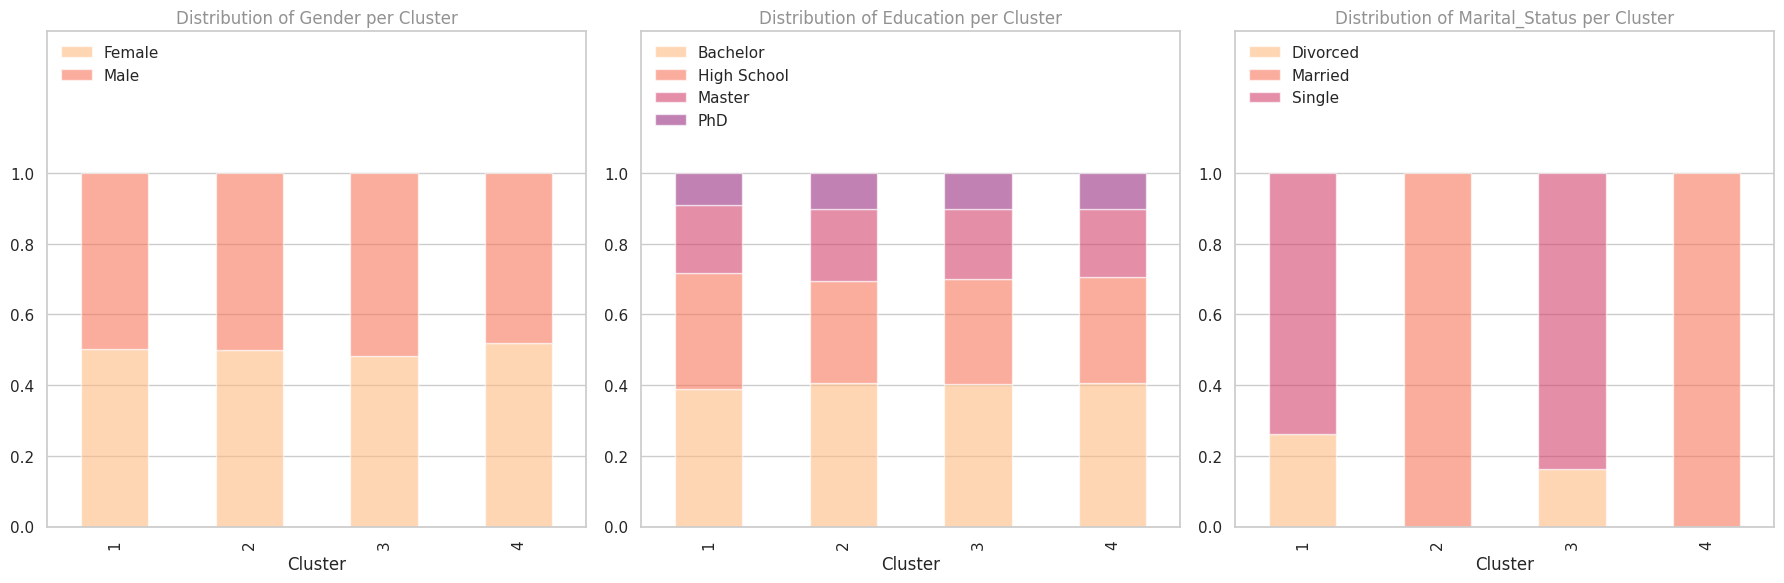

In [30]:
cat_columns= df.select_dtypes (include=['object'])

fig = plt.figure(figsize=(18,6))
for i, col in enumerate(cat_columns):
  df_plot = pd.crosstab(index=df['CLUSTER'], columns=df[col], normalize='index')
  ax = fig.add_subplot(1, 3, i+1)
  df_plot.plot.bar(stacked=True, ax=ax , alpha=0.6)
  ax.set_title(f'Distribution of {col.title()} per Cluster', alpha=0.5)
  ax.set_xlabel('Cluster')

  ax.set_ylim(0, 1.4)
  ax.legend(frameon=False, loc='upper left')
  ax.xaxis.grid(False)

  labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
  ax.set_yticks(labels)
  plt.tight_layout()

##Cluster 1:
 customers are typically older, married individuals with stable incomes and good credit habits. They prioritize spending on essentials like groceries and engage in moderate transaction volumes, making them a reliable and financially responsible segment.

##Cluster 2:
 customers are typically younger, single females with moderate income and credit limits. They utilize a significant portion of their credit, enjoy retail and dining, and are less inclined towards online transactions or high-end spending like travel. They may represent a segment that is still building financial stability and credit history, potentially using credit to manage day-to-day expenses.



##Cluster 3:
 customers are typically young, predominantly married individuals who show very low credit card usage and spending across all categories. They might be financially conservative, have limited income, or prefer other payment methods, leading to a low-engagement profile with their credit cards.



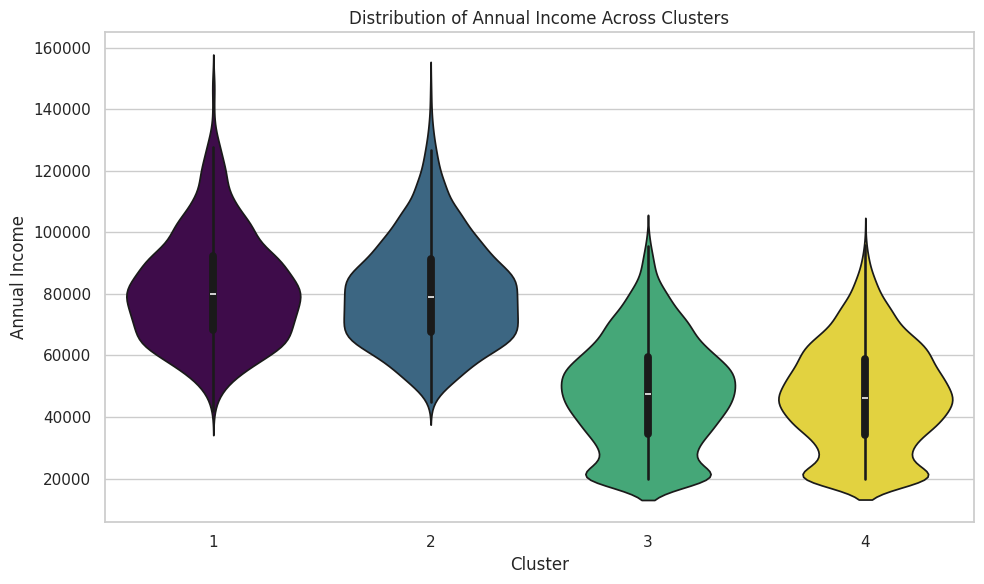

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='CLUSTER', y='Annual_Income', hue='CLUSTER', data=df, palette='viridis', legend=False)
plt.title('Distribution of Annual Income Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Annual Income')
plt.tight_layout()
plt.show()

The violin plot showing the distribution of Annual Income across the clusters has been successfully generated. Here's what we can observe:

Cluster 4 (High-Value Premium): As expected from our previous analysis, Cluster 4 shows the highest annual income range, with a significant density at higher income levels. The violin shape is wider at the top, indicating a concentration of customers with very high incomes.
Cluster 1 (Stable, Family-Oriented): This cluster has a good income distribution, with a median income that is higher than the overall average and a wider spread, showing a mix of moderately high-income individuals.
Cluster 2 (Younger/Independent, Credit-Heavy User): The income distribution for Cluster 2 is generally lower than Cluster 1 and 4, with the bulk of its members falling into the mid-to-low income brackets.
Cluster 3 (Young, Low-Engagement): This cluster clearly has the lowest annual income range, with the violin plot being concentrated at the lower end of the income spectrum.

Correlations with CLUSTER:


,CLUSTER
Travel_Spending_Pct,0.010555
Entertainment_Spending_Pct,0.005097
Groceries_Spending_Pct,0.004797
Retail_Spending_Pct,-0.011097
Dining_Spending_Pct,-0.013313


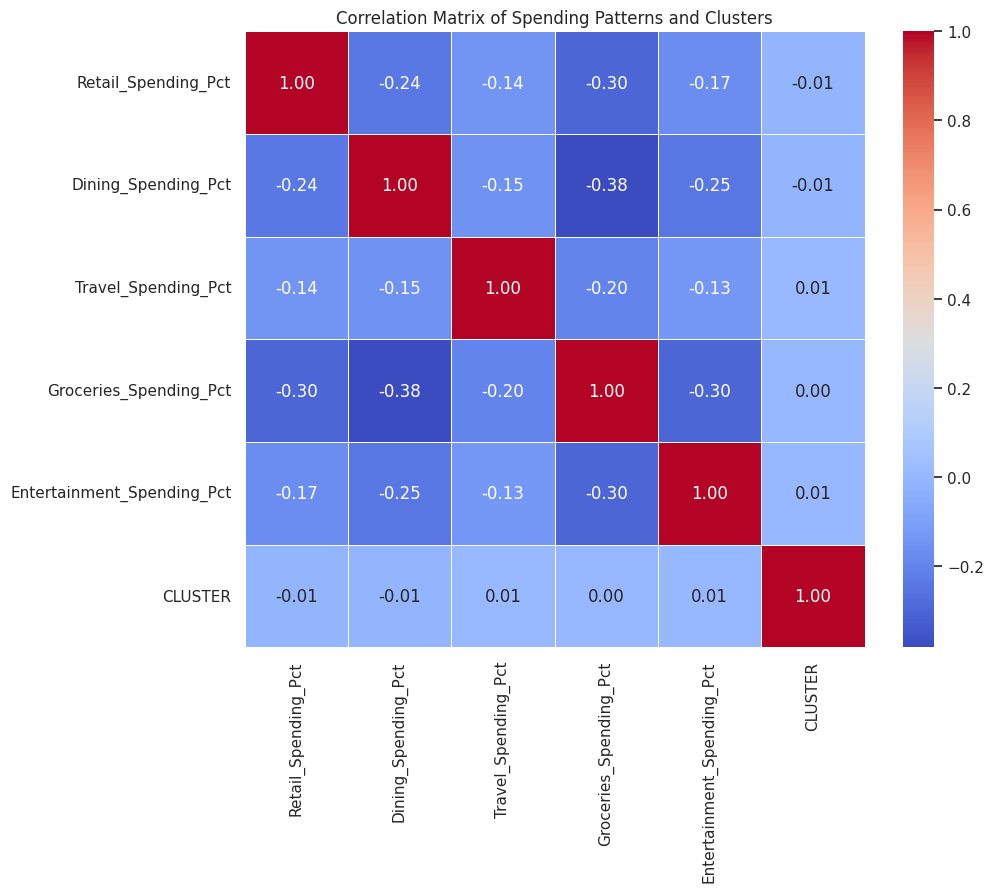

In [32]:
# Select spending pattern columns and the 'CLUSTER' column
spending_cols = [
    'Retail_Spending_Pct',
    'Dining_Spending_Pct',
    'Travel_Spending_Pct',
    'Groceries_Spending_Pct',
    'Entertainment_Spending_Pct',
    'CLUSTER'
]

spending_df = df[spending_cols]

# Calculate the correlation matrix
correlations_spending = spending_df.corr()

# Display correlations with the 'CLUSTER' column
print("Correlations with CLUSTER:")
display(correlations_spending['CLUSTER'].drop('CLUSTER').sort_values(ascending=False))

# Visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_spending, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Spending Patterns and Clusters')
plt.show()

These values are all very close to zero. This indicates that there is no strong linear correlation between the cluster assignments and individual spending percentage categories.

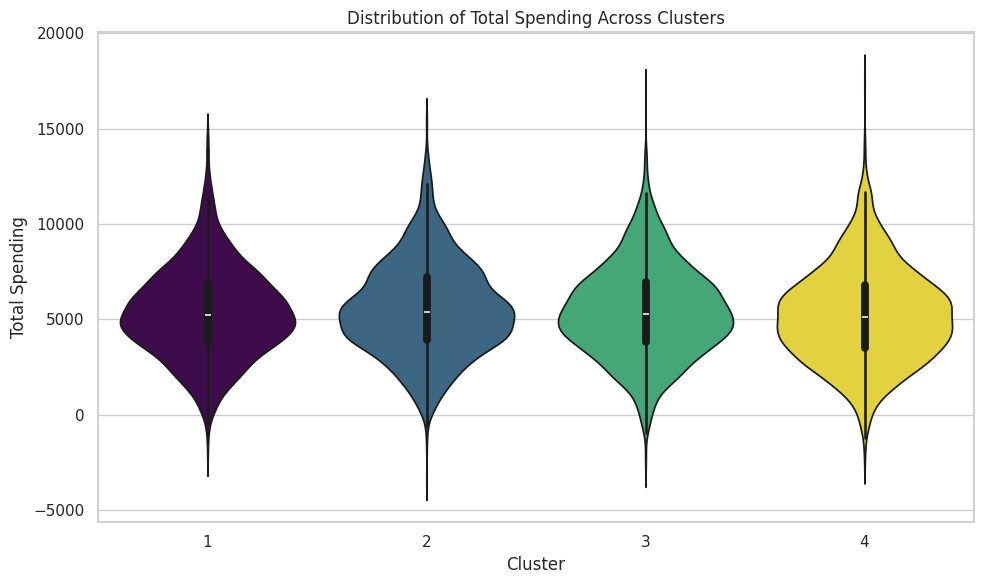

In [33]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='CLUSTER', y='Total_Spending', hue='CLUSTER', data=df, palette='viridis', legend=False)
plt.title('Distribution of Total Spending Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Total Spending')
plt.tight_layout()
plt.show()

The violin plot showing the distribution of Annual Income across the clusters has been successfully generated. Here's what we can observe:

##Cluster 4 (High-Value Premium):
As expected from our previous analysis, Cluster 4 shows the highest annual income range, with a significant density at higher income levels. The violin shape is wider at the top, indicating a concentration of customers with very high incomes.
##Cluster 1 (Stable, Family-Oriented):
 This cluster has a good income distribution, with a median income that is higher than the overall average and a wider spread, showing a mix of moderately high-income individuals.
##Cluster 2 (Younger/Independent,
 Credit-Heavy User): The income distribution for Cluster 2 is generally lower than Cluster 1 and 4, with the bulk of its members falling into the mid-to-low income brackets.
##Cluster 3 (Young, Low-Engagement):
 This cluster clearly has the lowest annual income range, with the violin plot being concentrated at the lower end of the income spectrum.